# KNN

In [1]:
import pandas as pd

data = pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [2]:
data.isnull().sum().sum()

0

In [3]:
data.drop(['date'], axis = 1, inplace = True)

In [4]:
data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [5]:
x = data[['precipitation','temp_max','temp_min','wind']]
y = data['weather']
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [6]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x,y,test_size = 0.20)

In [7]:
from sklearn.neighbors import KNeighborsClassifier as knc

model = knc(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [8]:
y_pred_train = model.predict(x_train)

In [9]:
y_pred_train

array(['rain', 'sun', 'fog', ..., 'sun', 'rain', 'sun'], dtype=object)

In [10]:
y_pred_test = model.predict(x_test)
y_pred_test

array(['sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun',
       'rain', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun',
       'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'fog', 'sun', 'rain',
       'rain', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun',
       'rain', 'rain', 'snow', 'sun', 'rain', 'rain', 'sun', 'sun',
       'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun',
       'sun', 'sun', 'sun', 'fog', 'sun', 'rain', 'rain', 'rain', 'rain',
       'rain', 'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun',
       'sun', 'sun', 'fog', 'rain', 'sun', 'rain', 'rain', 'rain',
       'drizzle', 'rain', 'sun', 'sun', 'rain', 'rain', 'rain', 'rain',
       'snow', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain',
       'fog', 'sun', 'sun', 'rain', 'drizzle', 'rain', 'sun', 'sun',
      

In [11]:
from sklearn.metrics import confusion_matrix as cf

c = cf(y_test,y_pred_test)
c

array([[  1,   3,   0,   0,   6],
       [  1,   1,   2,   0,  16],
       [  0,   4, 115,   0,  11],
       [  1,   0,   1,   2,   1],
       [  4,   7,  13,   0, 104]])

<AxesSubplot:>

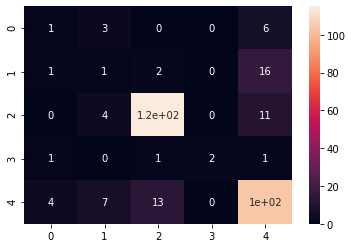

In [12]:
import seaborn as sn

sn.heatmap(c,annot = True)

In [13]:
from sklearn.metrics import accuracy_score

print('Training Data Accuracy : ',accuracy_score(y_train,y_pred_train))

Training Data Accuracy :  0.8287671232876712


In [14]:
print('Testing Data Accuracy : ',accuracy_score(y_test,y_pred_test))

Testing Data Accuracy :  0.7610921501706485


In [15]:
for i in range(1,11):
    model = knc(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred_test = model.predict(x_test)
    print('Accuracy {} :'.format(i),accuracy_score(y_test,y_pred_test))
    

Accuracy 1 : 0.7030716723549488
Accuracy 2 : 0.6552901023890785
Accuracy 3 : 0.7303754266211604
Accuracy 4 : 0.7508532423208191
Accuracy 5 : 0.7610921501706485
Accuracy 6 : 0.7508532423208191
Accuracy 7 : 0.764505119453925
Accuracy 8 : 0.7679180887372014
Accuracy 9 : 0.7747440273037542
Accuracy 10 : 0.7713310580204779
